# 3. 잘 만든 Augmentation, 이미지 100장 안 부럽다

## 1. 들어가며

![patterns](./img/patterns.jpg)

https://unsplash.com/photos/GZMjMukr5zU

딥러닝 모델을 학습 시키기 위해서는 대량의 데이터를 확보해야 한다. 대표적인 이미지 데이터셋인 이미지넷(ImageNet)은 약 1,400만 장의 이미지를 갖고 있고, 분류 대상 클래스가 10개라 상대적으로 간단해 보이는 CIFAR-10도 몇 만 장의 데이터를 가지고 있다.

미리 공개되어 있는 데이터셋 외에도 우리가 원하는 문제를 풀 때는 이에 맞는 데이터가 추가로 필요하다. 하지만 이러한 데이터를 몇 만 장씩 구축하는데는 많은 비용과 시간이 필요하다. 이때, 제한된 데이터셋을 최대한 활용하기 위해서 augmentation이라는 방법을 사용할 수 있다. 그렇다면 augmentation은 어떻게 사용하는 것이며 우리에게 어떤 효과를 줄 수 있을까?

### 실습목표
---
1. Augmentation을 하는 이유를 알아간다.
2. 여러 가지 Augmentation 방법을 알아둔다.
3. 학습에 Augmentation을 적용할때 주의해야 할 점을 숙지한다.

### 학습 내용
---
1. 데이터셋의 현실
2. Data Augmentation이란?
3. 텐서플로우를 사용한 Image Augmentation
4. imgaug 라이브러리
5. 더 나아간 기법들

### 준비물
---
터미널을 열고 개인 실습환경에 맞추어 경로를 변경, 일부 실습에 필요한 디렉토리를 만들어주자.

```bash
$ mkdir -p ~/AIFFEL/Going_Deeper/GD3_Augmentation1/data_augmentation/images
```

## 2. 데이터셋의 현실

### 1) 대량의 데이터셋
앞서 이야기 했듯, 이미지넷은 1,400만 장의 이미지를 보유하고 있으며, 우리가 자주 사용하는 CIFAR-10만 하더라도 학습용 데이터셋은 5만 장이나 된다.

이런 규모의 데이터셋을 만드는 데 얼마나 큰 비용이 들까? 라벨 데이터를 포함해 장당 10원에 불과하다고 하더라도 이미지넷과 같은 데이터셋을 구축하기 위에서는 1억이 넘는 비용이 들어간다. 물론 실제로 이러한 데이터셋을 직접 구축하려면 이보다 훨씬 비싼 가격이 들어간다.

![dataset](./img/dataset.jpg)

[출처 : https://www.robots.ox.ac.uk/~vgg/software/via/images/via_demo_screenshot2_via-2.0.2.jpg]

### 2) 직접 구축하는 데이터셋
사진을 보고 시내의 유명한 카페를 분류하는 모델을 만들어야하는 프로젝트가 생겼다. 그러면 우리는 어떻게 데이터셋을 모을 수 있을까?

강남의 카페를 조사하기 위해서 인스타그램(Instagram)을 크롤링해 20여 개 카페의 사진 약 2,500장을 얻을 수 있었다고 상상해보자. 처음 크롤링할 때는 많았으나 내부 인테리어 사진으로 카페를 구분하기 위해서 음식 사진, 사람 사진을 제외하고 나니 많은 수가 줄어들었다. 이처럼 직접 데이터를 수집한다면 만 장 단위로 데이터셋을 모으기가 쉽지 않다는 것을 알 수 있다.

![insta](./img/insta.png)

<center><b>[현실의 문제를 해결하기 위해 맞닥뜨려야 하는 데이터들은 충분히 모으기도 쉽지 않지만 고품질로 정제하는 과정도 만만치 않다.]</b></center>

## 3. Data Augmentation이란? (1) 개요
그렇다면 어떻게 해야 할까? 열심히 모은 데이터셋을 최대한 활용할 수 있는 방법은 없을까?

Data augmentation은 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법이다다. 일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용한다. 이를 통해 1장의 이미지를 더 다양하게 쓸 수 있게 된다.

아래 비디오를 보고 data augmentation의 개념을 익혀보자.

[![Data Augmentation](http://img.youtube.com/vi/JI8saFjK84o/0.jpg)](https://youtu.be/JI8saFjK84o) 

데이터가 많아진다는 것은 과적합(overfitting)을 줄일 수 있다는 것을 의미한다. 또한 우리가 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있다. 예를 들어, 우리가 학습한 데이터는 노이즈가 많이 없는 사진이지만 테스트 이미지는 다양한 노이즈가 있는 경우 테스트에서 좋은 성능을 내기 위해서는 이러한 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이 이런 노이즈에 잘 대응할 수 있도록 해야한다. 이렇게 data augmentation은 데이터를 늘릴 뿐만 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와주기도 한다.

### 이미지 데이터 augmentation
---
이미지 데이터의 augmentation은 포토샵, SNS의 사진 필터, 각종 카메라 앱에서 흔히 발견할 수 있는 기능들과 비슷하다. 쉬운 예로는 모델이 다양한 색상의 사진을 학습하게 하기 위해서 우리가 인스타그램에 업로드할 때 쓰는 색상 필터들을 적용해 볼 수 있다. 또 좌우 대칭이나 상하 반전과 같이 이미지의 공간적 배치를 조작할 수도 있다.

![augmentation](./img/augmentation.png)

<center><b>[출처 : https://www.pinterest.com.mx/pin/441212094721387255/?autologin=true&_client_id=CLIENT_ID(_)&mweb_unauth_id=%7B%7Bdefault.session%7D%7D&from_amp_pin_page=true]</center></b>

## 4. Data Augmentation이란? (2) 다양한 Image Augmentation 방법

그렇다면 image augmentation 기법에는 구체적으로 어떤 것들이 있는지 살펴보자. 먼저 텐서플로우 튜토리얼에 소개된 image augmentation 예제들로부터 시작하겠다. 아래 텐서플로우 페이지에서는 텐서플로우 API를 사용해 바로 적용할 수 있는 image augmentation 기법들을 소개하고 있다.

* [Tensorflow의 data_augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)

__Flipping__

Flip은 이미지를 대칭하는 기능이다. 우리가 거울을 보면 반전이 되듯이 좌우 또는 상하로 이미지를 반전시키는 방법이다. 분류 문제에서는 문제가 없을 수 있지만 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해주어야 한다.<br>
만약 숫자나 알파벳 문자를 인식(recognition)하는 문제에 적용할 때도 주의해야 할 것이다. 상하나 좌우가 반정될 경우 다른 글자가 될 가능성이 있기 때문이다.

![flip](./img/flip.png)

https://www.tensorflow.org/tutorials/images/data_augmentation

__Gray scale__

Gray scale은 3가지 채널(channel)을 가진 RGB 이미지를 하나의 채널을 가지도록 해준다. 아래의 시각화 예제는 흑백 대신 다른 색상으로 이미지를 표현했다. 텐서플로우에서 어떻게 구현이 되었는지는 아래 코드를 확인하자. RGB 각각의 채널마다 가중치(weight)를 주어 가중합(weighted sum)을 하였다. 사용된 가중치의 경우 합이 1이 됨을 알 수 있다.

![gray](./img/gray.png)

https://www.tensorflow.org/tutorials/images/data_augmentation


__Saturation__

Saturation은 RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경하고 S(saturation) 채널에 오프셋(offset)을 적용, 조금 더 이미지를 선명하게 만들어준다. 이후 다시 우리가 사용하는 RGB 색상 모델로 변경을 해준다.

* 참고: [영상인식과 색상모델(Gray,RGB,HSV,YCbCr)](https://darkpgmr.tistory.com/66)

![saturation](./img/saturation.png)

https://www.tensorflow.org/tutorials/images/data_augmentation

__Brightness__

밝기를 조절할 수도 있다. 우리가 주로 사용하는 RGB에서 (255,255,255)는 흰색을, (0,0,0)은 검은색을 의미한다. 따라서 이미지는 RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워진다. 이를 통해서 Brightness를 변경할 수 있다.

![brightness](./img/brightness.png)

https://www.tensorflow.org/tutorials/images/data_augmentation

__Rotation__

Rotation은 이미지의 각도를 변환해준다. 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해 주면 바로 사용할 수 있다. 하지만 90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야 한다.

![rotation](./img/rotation.png)

https://www.tensorflow.org/tutorials/images/data_augmentation

__Center Crop__

Center crop은 이미지의 중앙을 기준으로 확대하는 방법이다. 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있으니 주의가 필요하다. 예를 들어 고양이 라벨의 이미지를 확대해 한 장 더 만들어내려면, 이미지 내에 고양이의 형상을 유지해야 하고 털만 보이는 이미지를 만들어서는 안 된다.

![Center Crop](./img/cc.png)

https://www.tensorflow.org/tutorials/images/data_augmentation


### 정리
---
위의 기본적인 방법들 외에도 다양한 augmentation 방법론이 있다. 이들 방법을 사용하면 아래 이미지처럼 라벨은 유지한 채 다양한 이미지를 학습 데이터로 사용할 수 있게 된다.

![augmentation](./img/augmentation.jpg)

<center><b>[출처 : https://github.com/aleju/imgaug]</center></b>

__위 이미지는 원본 이미지에 다양한 augmentation을 적용한 것이다. 우리가 위에서 언급하지 않은 기법이 적용된 것들 목록.__

* Gaussian noise
* Contrast change
* Sharpen
* Affine transformation
* Padding
* Blurring

위 이미지처럼 augmentation 방법은 다양하다. 풀어야 하는 문제에 따라서 augmentation 코드는 직접 만들거나 새로운 라이브러리를 활용해야 할 수 있다. 다음 스텝에서는 텐서플로우의 라이브러리와 다른 image augmentation 전용 라이브러리를 활용하는 방법을 익혀보겠다.

## 5. 텐서플로우를 사용한 Image Augmentation (1) Flip

### 준비하기
---
이제 위에서 봤던 방법들을 코드로 사용해 보겠다. 필요에 따라서 매개변수에 전달하는 값을 바꿔보고 데이터에 랜덤하게 적용해 보도록 하겠다. 이미지를 PIL로 로드하고 이를 텐서로 바꾼 뒤, 기법을 하나씩 적용해보고 이를 다시 이미지로 화면에 표시해서 결과를 확인하겠다.

혹시 PIL(pillow) 라이브러리가 설치되어 있지 않다면 아래 명령어로 컴퓨터에 설치하자.

```bash
$ pip install pillow
```

인터넷에서 고양이 사진을 한 장 다운로드 받고 images 폴더로 이동시킨다.

```bash
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/mycat.jpg
$ mv mycat.jpg ~/AIFFEL/Going_Deeper/GD3_Augmentation1/data_augmentation/images
```

In [4]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/AIFFEL/Going_Deeper/GD3_Augmentation1/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel-dj10/Shinest-changwon-AIFFEL_GD/CV/Lecture/GD2/data_augmentation/images/mycat.jpg'

이미지를 불러와 적절히 리사이징 해준다. 500x400으로 크기를 조절해 주었다.

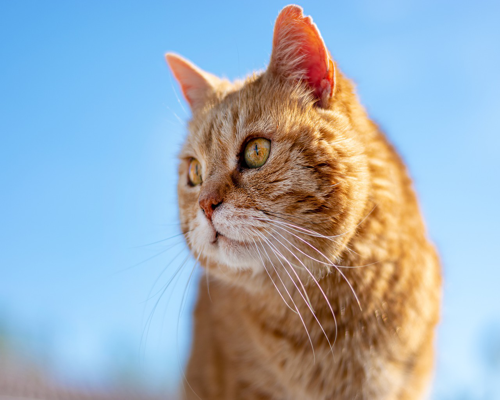

In [5]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip 해보기
---
Flip을 적용해준다. Flip은 `flip_left_right`와 `flip_up_down` 두 가지로 좌우와 상하 반전으로 구분된다.

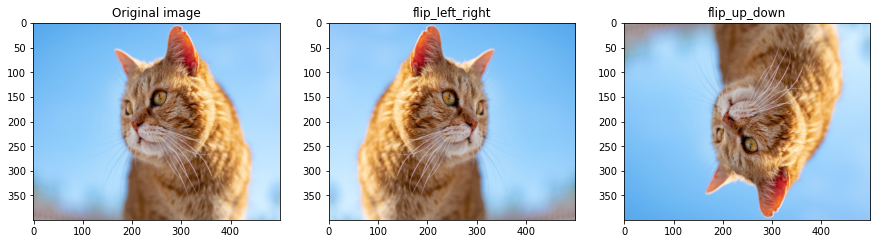

In [6]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

위의 함수들은 일괄적으로 상하 또는 좌우 반전을 적용한다. 이를 확률에 따라서 적용되도록 해야한다. 그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이다. 이를 위해서 활용할 수 있는 것이 `random_flip_left_right`와 `random_flip_up_down`이다. 필요에 따라서는 직접 이 둘을 합쳐서 `random_flip`으로 상하좌우 반전을 적용하는 함수를 직접 만들어 볼 수 있겠다. 아래 코드를 반복해서 돌려보면서 random augmentation이 어떻게 작동하는지 직접 확인해보자.

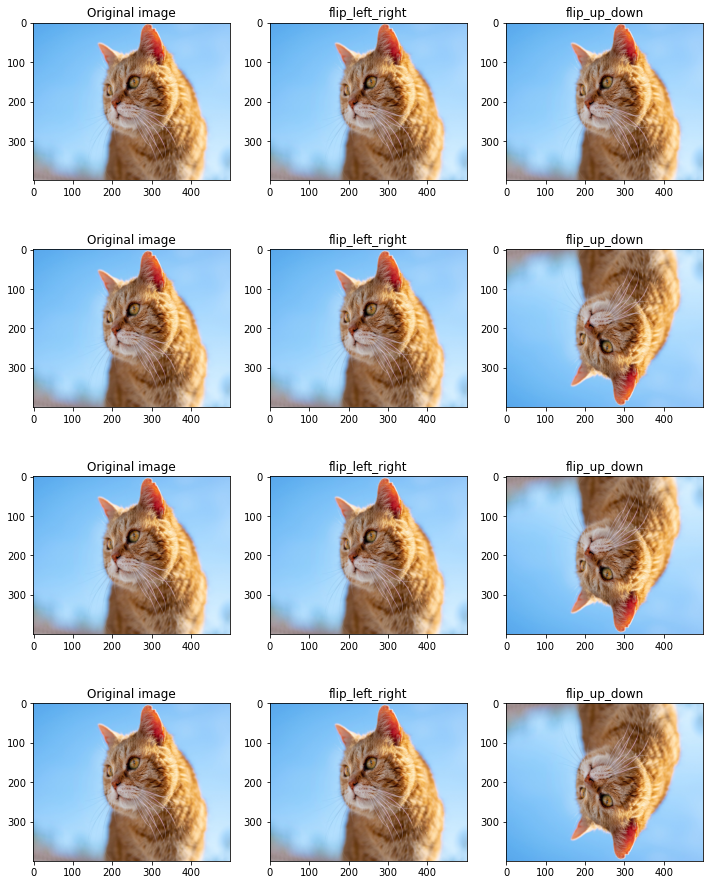

In [7]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## 6. 텐서플로우를 사용한 Image Augmentation (2) Center Crop
Center crop은 이전에 설명드렸던 것과 같이 중앙을 기준으로 자른 이미지를 사용하는 augmentation 기법이다.

단순하게 중심점을 기준으로 사진을 확대하는 것으로 생각하기 쉽지만, 적용할 때 주의해 사용해야 한다. `central_fraction`은 얼마나 확대를 할지를 조절하는 매개변수이다. 1.0인 경우는 원본 이미지와 같다. 그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있다. 따라서 `central_fraction`의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야한다.

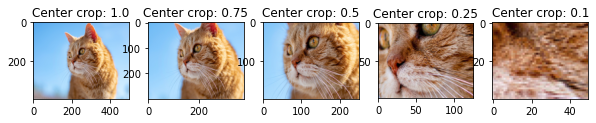

In [8]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

랜덤하게 `centeral_crop`을 적용하는 함수는 텐서플로우에서 기본적으로 제공되지 않는다. 그렇다면 어떻게 만들 수 있을까? 파이썬의 `random` 모듈을 사용해도 되고 텐서플로우의 랜덤 모듈을 사용해도 된다.

아래는 `tf.random.uniform`을 사용해서 `central_fraction` 매개변수에 전달할 값을 만들고 이를 사용해 `cropped_tensor`를 만들어내는 `random_central_crop()` 함수이다.

In [9]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

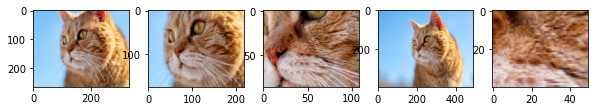

In [10]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

__텐서플로우의 `tf.random.uniform()`과 `tf.random.normal()`의 차이.__

랜덤값을 uniform distribution으로 뽑는 것과 normal distribution으로 뽑는 차이이다. normal distribution의 경우 mean, std를 통해서 분포를 조절할 수 있다.

## 7. 텐서플로우를 사용한 Image Augmentation (3) 직접 해보기
이제 직접 augmentation을 활용해 보는 시간을 갖겠다. 직접 사용할 함수는 `tf.image.random_crop()`와 `tf.image.random_brightness()`이다.

### tf.image.random_crop()
---
* [tf.image.random_crop](https://www.tensorflow.org/api_docs/python/tf/image/random_crop)

위의 공식 문서를 확인하고 고양이 사진에 `random_crop()`을 적용해보자.

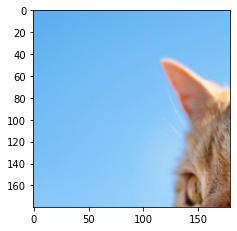

In [11]:
# apply random_crop on cat image
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

적용한 샘플을 5장 만들어서 직접 화면에 띄워보자.

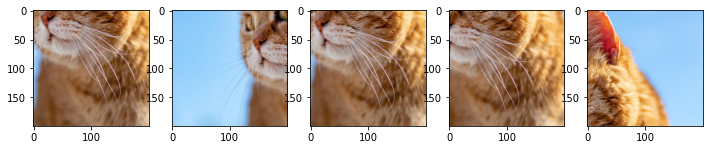

In [12]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

### tf.image.random_brightness()
---
두 번째로 적용할 함수는 `tf.image.random_brightness()`이다. 공식 문서를 확인하면서 이미지에 적용해보자.

* [tf.image.random_brightness](https://www.tensorflow.org/api_docs/python/tf/image/random_brightness)

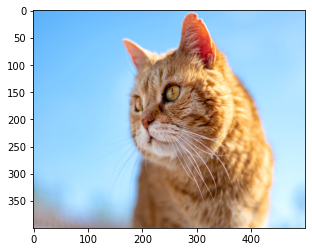

In [13]:
# apply random_brightness on cat image

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)
plt.imshow(random_bright_image)

> _`tf.image.random_brightness()`만 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과하게 될 수도 있다. 이 경우 `plt.imshow()`에서 rescale되어 밝기 변경 효과가 상쇄되어 보일 수도 있다. 따라서 `tf.image.random_brightness()` 다음에는 `tf.clip_by_value()`를 적용해 주는 것을 잊지 말아야 한다._

적용한 샘플을 5장 만들어서 직접 화면에 띄워보자.

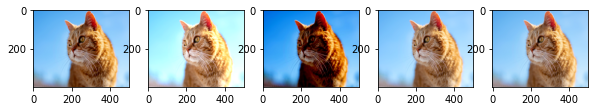

In [14]:
# display 5 random brightness images

plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## 8. imgaug 라이브러리

### imgaug 라이브러리 사용하기
---
![imgaug](./img/imgaug.png)

https://github.com/aleju/imgaug

* [imgaug 라이브러리](https://github.com/aleju/imgaug)
* [Overview of imgaug](https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html)

지금까지 텐서플로우에서 기본적으로 제공되는 augmentation 함수들을 확인해보았다. 이러한 augmentation만을 모아서 제공하는 전문 라이브러리들이 있다. 이번에는 그 중 `imgaug`라는 라이브러리를 활용하겠다.

이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용이 되어야 한다. 위 표에서 "Image" 컬럼은 각 원본 이미지들이고 "Heatmaps", "Seg. Maps"(Segmentation Maps), "Keypoints", "Bouding Boxes, Polygons" 컬럼은 해당 원본 데이터에 대해 각 이미지 태스크에 따른 정답 데이터이다. 표에서 볼 수 있듯이, 정답 데이터는 원본 데이터의 augmentation에 따라 같이 변화되어야 한다. 이미지가 반전이 되었는데 정답으로 활용되는 정답데이터가 반전이 되지 않은 bounding box라면 틀린 정답을 모델이 학습하게 되고 이는 성능에 악영향을 줄 수 있다.

먼저 설치를 하겠다.

```bash
$ pip install -q imgaug
```

`imgaug`에서는 배열을 이미지의 기본 형태로 사용한다. 따라서 PIL Image 데이터형을 넘파이(numpy) 배열로 변환하여 사용하도록 한다.

In [15]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

### augmentation 기법 사용해 보기
---

__iaa.Affine()__

이제 위에서 확인해보지 않았던 augmentation 중 하나를 해보자. `imgaug.augmenters`의 `Affine()`은 아핀 변환(Affine transform)을 이미지에 적용한다. 2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있다. 자세한 내용은 아래 참고자료를 확인해보자.

* 참고: [2D 변환 (Transformations)](https://darkpgmr.tistory.com/79)

아래 코드를 실행하면 -25도와 25도 사이에 랜덤하게 각도를 변환하는 augmention을 볼 수 있다.

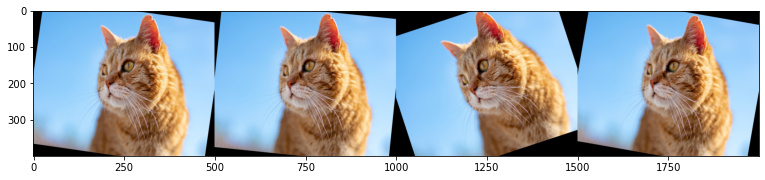

In [16]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

__iaa.Crop()__

이번에는 텐서플로우 API로 사용했던 crop 기법을 적용해 보겠다. Crop 하려는 원본 이미지의 비율을 매개변수로 사용하여 이미지를 생성한다.

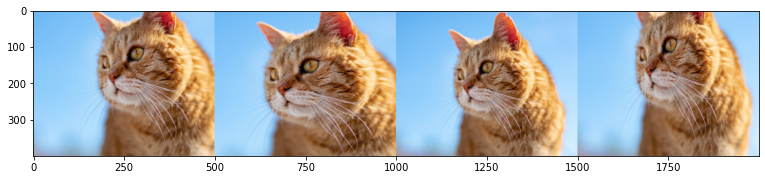

In [17]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

__iaa.Sequential()__

이렇게 하나씩 기법을 적용하다 보면 "augmentation 기법들을 한 번에 조합하여 사용할 수는 없을까?" 라는 생각이 든다. `imgaug`에서는 `iaa.Sequential`를 사용해서 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있다. 아래 코드에서는 위에서 사용한 rotate와 crop이 적용된 결과를 볼 수 있다.

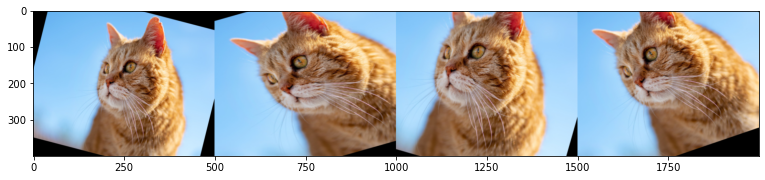

In [18]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

우리는 augmentation을 최대한 다양하게 적용하고 싶다. `iaa.Sequential()`의 augmentation 순서는 위 코드처럼 사용하면 고정이 된다. 하지만 random으로 기법들의 순서를 바꾸어 사용할 수 있다. 아래 코드블록에서 random을 활용해서 순서를 바꿀 수 있도록 코드를 변경해보자.

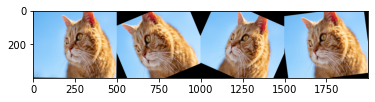

In [19]:
# modify iaa.sequential to use random step

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)
plt.imshow(np.hstack(images_aug))

여러 가지 augmentation 중 하나를 선택하도록 할 때는 어떻게 할 수 있을까? `iaa.OneOf()`를 사용하면 여러 augmentation 기법들 중 하나를 선택하도록 할 수 있다. 예를 들어 색상에 변화를 줄 때 여러 변환이 불필요한 경우 선택지 중 하나의 기법만 적용되도록 할 수 있다. 아래에서는 gray scale로 변환하거나 saturation을 변화하는 augmentation 둘 중 하나가 적용되는 함수를 볼 수 있다.

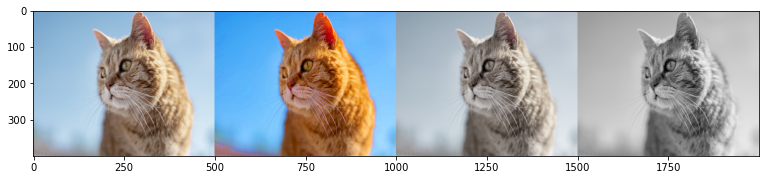

In [20]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

`imgaug`는 augmentation들이 일정 확률로 선택이 되게 하는 기능을 제공한다. 이 기능을 사용하는 `iaa.Sometimes()`는 위의 `iaa.OneOf()`처럼 사용할 수 있는데, 이를 활용해서 `iaa.AddToSaturation()`을 0.6의 확률로, `iaa.Grayscale()`를 0.2의 확률로 적용하는 augmentation 함수를 구현하고 결과를 시각화보자.

* 참고: [iaa.Sometimes()](https://imgaug.readthedocs.io/en/latest/source/overview/meta.html#sometimes)

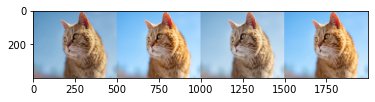

In [21]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))

`iaa.Sequntial()`과 `iaa.OneOf()`, `iaa.Sometimes()` 등 각종 augmentation 기법을 활용하면 매우 다양한 조합을 만들어 낼 수 있다. 개와 고양이를 분류하는 모델을 만든다고 가정하고 직접 복잡한 augmentation을 만들어보자. 이 때 조합될 수 있는 가짓수는 1024가지가 넘도록 해보자. 시각화는 100장을 하도록 한다.

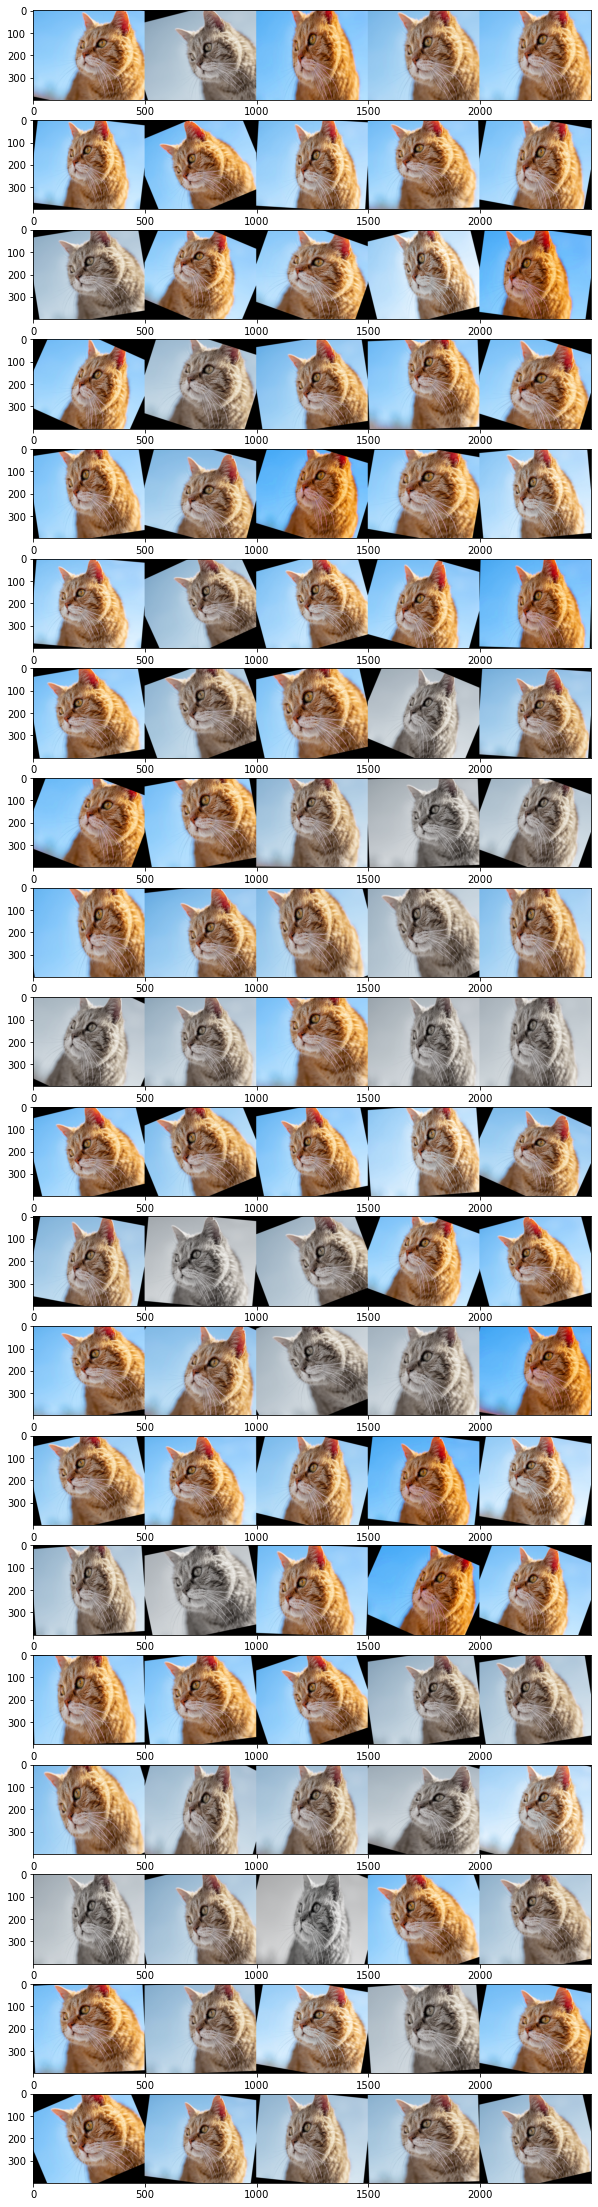

In [22]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()

## 9. 더 나아간 기법들
지금까지 우리가 보아왔던 방식은 딥러닝이 아닌 일정한 수학적 알고리즘을 적용한 augmentation들이다. 하지만 딥러닝이 발전함에 따라 data augmentation에도 딥러닝을 활용하는 방식이 개발되고 있다.

대표적으로 __GAN__을 Data augmentation에 활용할 수 있다. 아래 논문에서는 전통적인 augmentation 방법과 GAN을 활용한 augmentation을 적용하여 효과를 실험했다. 쉬운 예로는 전통적인 색상 변환 대신 스타일 트랜스퍼(style transfer) 모델을 적용해 볼 수 있겠다.

* [The Effectiveness of Data Augmentation in Image Classification using Deep Learning](http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf) _by Jason Wang and Luis Perez_

![gan](./img/gan.png)

http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf